In [ ]:
!pip install GetOldTweets3

In [26]:
!pip install GraphViz

In [ ]:
!pip install konlpy

In [3]:
import GetOldTweets3 as got
from bs4 import BeautifulSoup
import datetime

import time

import scipy as sp
import pandas as pd

#자연어 분석
from konlpy.tag import Kkma     ;   kkma = Kkma()
from konlpy.tag import Hannanum ;   hannanum = Hannanum()
from konlpy.tag import Okt      ;   t = Okt()   # 구 트위터
import pickle

In [4]:
# 언어 분석 라이브러리
from sklearn.feature_extraction.text import CountVectorizer # 빈도수 
from sklearn.feature_extraction.text import TfidfVectorizer # 통계적인 툴
from sklearn.linear_model import LogisticRegression # 긍정 or부정 이진분류
from sklearn.pipeline import Pipeline  # 모델을 한꺼번에 저장해두고 사용
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 그래프
%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz



# 그래프 문자 깨지는 것 대처
import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 워닝 없애기
import warnings
warnings.filterwarnings('ignore')

In [5]:
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

# 트위터 크롤링

In [2]:
days_range = []

start = datetime.datetime.strptime("2020-03-22", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-03-24", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

In [3]:
for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))

In [4]:
print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-1]))
print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range)))

=== 설정된 트윗 수집 기간은 2020-03-22 에서 2020-03-23 까지 입니다 ===
=== 총 2일 간의 데이터 수집 ===


In [5]:
# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") 
# setUntil이 끝을 포함하지 않으므로, day + 1

In [6]:
start_date

'2020-03-22'

In [7]:
end_date

'2020-03-24'

In [8]:
# 트윗 수집 기준 정의
keyword = '미래통합당'

tweetCriteria = got.manager.TweetCriteria().setQuerySearch(keyword)\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           #.setMaxTweets(-1) 


In [12]:
# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
start_time = time.time()

try:
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
except:
    print("There is an error")

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))


=== Total num of tweets is 997 ===


In [17]:
# 원하는 변수 골라서 저장하기

from random import uniform
from tqdm import tqdm_notebook

# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    
    # 메타데이터 목록 
    username = index.username
    content = index.text
    tweet_date = index.date.strftime("%Y-%m-%d")
    tweet_time = index.date.strftime("%H:%M:%S")
    
    # 결과 합치기
    info_list = [tweet_date, tweet_time, username, content]
    tweet_list.append(info_list)
    

# 파일 저장하기

import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "time", "user_name", "text"])

# csv 파일 만들기
twitter_df.to_csv("{}_twitter_data_{}_to_{}.csv".format(keyword, days_range[0], days_range[-1]), index=False)
print("=== {} tweets are successfully saved ===".format(len(tweet_list)))


=== 997 tweets are successfully saved ===


In [18]:
twitter_df.head(10)

,date,time,user_name,text
0,2020-03-23,23:59:33,pax1208,유학생이든 여행객이든 교민이든 귀국해서 코로나 방역 퇴치에 최선 다 하는 정부에 고...
1,2020-03-23,23:58:41,asha0810,"정점식 미래통합당 의원이 ""자기만족을 위해 영상을 가지고 나 혼자 즐긴다는 것도 규..."
2,2020-03-23,23:58:17,Sungshin323,https://news.v.daum.net/v/20200322175548181 친일...
3,2020-03-23,23:56:55,bothjs2,광명이 먼저다. 2번이 바꾼다. #양주상 #광명 #광명시 #광명갑 #광명동 #철산동...
4,2020-03-23,23:56:43,blackgiant00,사퇴할망구... 미래통합당은 미래가 없어서 사퇴했으니 기독자유통일당은 자유가 없어서...
5,2020-03-23,23:56:21,bothjs2,광명이 먼저다. 2번이 바꾼다. #양주상 #광명 #광명시 #광명갑 #광명동 #철산동...
6,2020-03-23,23:55:50,cisp2012,文 대통령과 민주당이 공수처에 목매는 이유? (출처 : 미래통합당.. | 블로그)
7,2020-03-23,23:53:09,SEOJH3180,레드벨벳을 좋아하지 않았지만 노래 빨간맛은 중독성이 너무 강해서 나도 모르게 찾아듣...
8,2020-03-23,23:49:39,7pXK3W7u8RpJMgJ,비아그라처방 흥붅ㅈㅔ 1+1 전액후불 http://2002.qmwkolkif.spa...
9,2020-03-23,23:48:56,antiq800524,비아그라처방 흥뷴ㅈㅖ 정품 전액후불제 http://sss1.qmwkolkif.spa...


# 저장한 파일 읽어오기

In [5]:
minju = pd.read_csv('더불어민주당_twitter_data_2020-03-22_to_2020-03-23.xlsx')

In [10]:
minju

,date,time,user_name,text
0,2020-03-23,23:55:21,ExTerKhan,김진애 후보님께서는 더불어 민주당 소속이 아닌 현 시점에서도 이재명 지사에 대한 아...
1,2020-03-23,23:45:08,hallailbo,진보진영 더불어시민당 비례후보 '코로나와 싸우는 의사' 신현영 1번 배치..2번 김...
2,2020-03-23,23:44:46,akak1822,[총선 여론조사-성남분당을] 미래통합·한국당 지지도 모두 우세… 더불어민주당 30·...
3,2020-03-23,23:42:21,kicoo77,쓰레기 언론에 기생하는 기자들을 느꼈습니다 3S언론보도로 국민을 우민화하지 마십시오...
4,2020-03-23,23:42:13,jinpyokim,"아침부터 감동먹었습니다. 정직한 우리정부를 칭찬해주시고, 세류동의 도시재생사업 추진..."
...,...,...,...,...
1125,2020-03-22,00:08:24,rightandwin,"설령 미통당이 그간의 관례를 무시하고 미한당과의 합당 후 ""우리가 1당이니 국회의장..."
1126,2020-03-22,00:06:40,rightandwin,"이 말인즉슨, '1당이 국회의장을 가져가는 관례'를 따르면 21대 총선에서는 지역구..."
1127,2020-03-22,00:06:17,rightandwin,"하지만 20대 총선 직후 국회의장 후보를 결정할 때 새누리당은 ""관례대로 123석을..."
1128,2020-03-22,00:05:00,rightandwin,"그중 무소속 11석을 분석하면 더불어민주당 출신이 2석, 새누리당 출신이 7석, 그..."


## 더불어민주당 전처리

In [6]:
content_list  = minju['text'].values.tolist()

In [32]:
content_list

['김진애 후보님께서는 더불어 민주당 소속이 아닌 현 시점에서도 이재명 지사에 대한 아무런 소견이 없으시거나 또는 표명을 못 하실만한 저간의 사정이 있으신지요.',
 "진보진영 더불어시민당 비례후보 '코로나와 싸우는 의사' 신현영 1번 배치..2번 김경만·3번 권인숙·4번 이동주…최혜영·김병주 등 민주당 후보는 11번 이후 .. #더불어시민당 #더불어민주당 ",
 '[총선 여론조사-성남분당을] 미래통합·한국당 지지도 모두 우세… 더불어민주당 30·40대 높은 지지 ',
 '쓰레기 언론에 기생하는 기자들을 느꼈습니다 3S언론보도로 국민을 우민화하지 마십시오 진실을 보도하는것을 두려워하지 마십시요 유권자는 잘 알고있습니다 어느 정당에 분열하지 않고 투표해야 현 정부 발목 잡는 그들을 심판할수있는지! #더불어민주당 #더불어시민당 응원합니다',
 '아침부터 감동먹었습니다. 정직한 우리정부를 칭찬해주시고, 세류동의 도시재생사업 추진에 대해서 좋은말씀 해주신 분이 계셨습니다. 여기는 세류역입니다. 세류동 분들을 위한 좋은공약도 곧 소개해드리겠습니다.',
 "[단독] '지오영' 공적마스크 선정되기 직전 수십만장 '불법 판매' (출처 : 노컷뉴스 | 네이버 뉴스) http://naver.me/GuNf0R9e 기사내용) 지오영 고문 출신인 박명숙(60) 대한약사회 정책기획단장은 더불어민주당 4·15 총선 비례대표 후보 명단에 포함됐다. 코로나 마스크 대란 청와대가 범인 맞네",
 '더불어민주당은 열린민주당으로 밀어줄려고 엄청 애쓴다. 1번, 4번 은.. 뭐.. 제발 우리당 찍지마! 이런거지? 뭐 그렇게 표시나게.. 그런데, 입벌린 열린민주당도 참..ㅋㅋ 정의당도..ㅋㅋ 우짜자는겨?',
 '“분노합니다” 소녀의 아픔 앞에 낄낄 거렸을 그들, 모두 공범입니다 그들의 잔인한 수법과 잔인무도한 행태에 분개합니다 한명도 빠짐없이 협박죄, 성착취 등 주범과 같은 혐의로 처벌을 받길 강력히 원합니다 #모두공범이다 #포항 #문재인 #오중기',
 '비례 위성정당 설립으로 유세전 제약 받는 더

In [7]:
content_text = ''

for each_line in content_list:
    try:
        content_text = content_text + each_line + '\n'
    except:
        continue

In [8]:
tokens_ko = t.morphs(content_text)

In [9]:
import nltk
ko = nltk.Text(tokens_ko)
len(ko.tokens)

41368

In [15]:
ko.vocab().most_common(100)

[('.', 1142),
 ('민주당', 1062),
 ('더불어', 876),
 ('\n', 835),
 ('이', 739),
 ('을', 687),
 (',', 678),
 ('의', 509),
 ('에', 464),
 ('당', 431),
 ('들', 361),
 ('은', 344),
 ('를', 314),
 ('후보', 310),
 ('가', 289),
 ('"', 263),
 ("'", 252),
 ('한', 245),
 ('는', 243),
 (')', 225),
 ('(', 218),
 ('과', 209),
 ('도', 201),
 ('?', 197),
 ('에서', 181),
 ('으로', 172),
 ('로', 168),
 ('시민', 165),
 ('열린', 163),
 ('비례', 160),
 ('!', 156),
 ('·', 146),
 ('총선', 141),
 ('것', 141),
 ('하는', 139),
 ('#더불어민주당', 137),
 (']', 129),
 ('[', 127),
 ('정당', 125),
 ('미래', 121),
 ('의원', 118),
 ('코로나', 114),
 ('대', 107),
 ('..', 106),
 ('통합', 105),
 ('적', 101),
 ('...', 100),
 ('하고', 100),
 ('뉴스', 99),
 ('다', 97),
 ('입니다', 91),
 (':', 91),
 ('수', 90),
 ('-', 87),
 ('해', 87),
 ('님', 85),
 ('|', 85),
 ('고', 85),
 ('합니다', 84),
 ('1', 83),
 ('할', 82),
 ('선거', 81),
 ('국회의원', 80),
 ('와', 79),
 ('번', 77),
 ('19', 77),
 ('다음', 76),
 ('우리', 70),
 ('대통령', 70),
 ('더', 67),
 ('석', 67),
 ('인', 66),
 ('전', 66),
 ('국민', 64),
 ('까지', 64),
 ('갑'

In [93]:
# 불용어(stopwords) : 검색어로 사용 안하는거(관사,전치사,조사,접속사)
# 제거하기
stop_words = ['에','도','...','..','.','!','가','\n','\r\n','\r\n\r\n','요','으로','로',\
             '은','는','이','[',']','자','\'','\"','?','(',')',',','-',':',';','을','의','를','들','과','것','대','전','인','석',\
             '”','·','‘','“','에서','다','|','할','그','’','하는','하고','고','입니다','한','당','수','합니다','저','못','성',\
             '해','와','등','지','안','이다','원','했다','하겠습니다','!!','했습니다','명','만','제','…','&','위해','였다',\
             '하지','위','더','있다','때','그리고','된','더불어','민주당','서','니','할','까지','《','1','2','3','4','5','미래',\
              '에게','통합','한다','》','이라고','해야','후보','식','미','공','나','~','라','이런','번','개','님','구','진짜','잘']

tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('의원', 144),
 ('총선', 122),
 ('#미래통합당', 111),
 ('정당', 111),
 ('코로나', 94),
 ('뉴스', 89),
 ('공천', 87),
 ('적', 83),
 ('국민', 83),
 ('선거', 76),
 ('대표', 75),
 ('비례', 68),
 ('한국', 67),
 ('황교안', 64),
 ('정부', 57),
 ('말', 55),
 ('번방', 55),
 ('미래한국당', 54),
 ('19', 52),
 ('대구', 49),
 ('국회의원', 48),
 ('다음', 48),
 ('지지', 47),
 ('생각', 47),
 ('정치', 46),
 ('시민', 46),
 ('국회', 45),
 ('자유', 45),
 ('조국', 45),
 ('문재인', 45),
 ('국민의당', 44),
 ('정의당', 44),
 ('사람', 43),
 ('기자', 43),
 ('대통령', 41),
 ('신천지', 40),
 ('서울', 39),
 ('우리', 39),
 ('이번', 38),
 ('#총선', 37),
 ('법', 37),
 ('출마', 36),
 ('정점', 34),
 ('비례대표', 34),
 ('예비', 33),
 ('당선', 33),
 ('갑', 33),
 ('n', 32),
 ('공개', 32),
 ('지역', 32)]

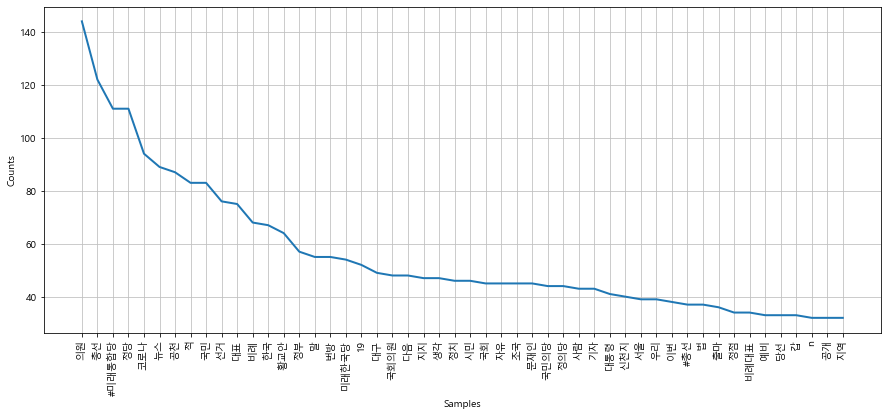

In [94]:
import graphviz
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [22]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

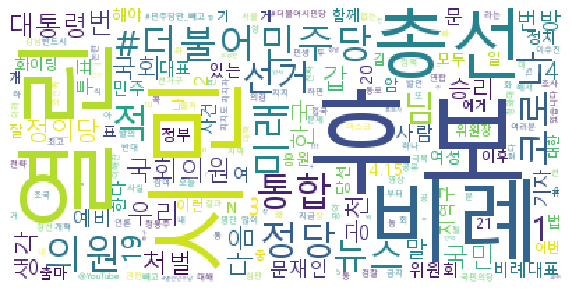

In [23]:
data = ko.vocab().most_common(200)

# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 미래통합당

In [6]:
tonghap = pd.read_csv('미래통합당_twitter_data_2020-03-22_to_2020-03-23.csv')
tonghap

,date,time,user_name,text
0,2020-03-23,23:59:33,pax1208,유학생이든 여행객이든 교민이든 귀국해서 코로나 방역 퇴치에 최선 다 하는 정부에 고...
1,2020-03-23,23:58:41,asha0810,"정점식 미래통합당 의원이 ""자기만족을 위해 영상을 가지고 나 혼자 즐긴다는 것도 규..."
2,2020-03-23,23:58:17,Sungshin323,https://news.v.daum.net/v/20200322175548181 친일...
3,2020-03-23,23:56:55,bothjs2,광명이 먼저다. 2번이 바꾼다. #양주상 #광명 #광명시 #광명갑 #광명동 #철산동...
4,2020-03-23,23:56:43,blackgiant00,사퇴할망구... 미래통합당은 미래가 없어서 사퇴했으니 기독자유통일당은 자유가 없어서...
...,...,...,...,...
926,2020-03-22,00:23:25,ge4IbW0JqZWZC5z,이로써 미래통합당과 신천지는 한솥밥이라는 증거인가?지금 이바쁜시기에 왜 일못하게 방...
927,2020-03-22,00:18:47,keepjinbo,[3월 22일 일요일 아침] 주말에도 농성과 1인 시위를 이어갑니다. #해직공무원복...
928,2020-03-22,00:09:04,m0ILjFpYVO6zHkA,1. 일방적으로 법 통과를 밀어부친 더불어민주당 2. 일방적으로 법 통과를 밀어부친...
929,2020-03-22,00:08:12,a01086147617,헌법 개정에 대한 국민발안제 도입을 위한 헌법 개정안이 국회의원 148명(민주당92...


In [31]:
content_list2  = tonghap['text'].values.tolist()

content_text2 = ''

for each_line in content_list2:
    try:
        content_text2 = content_text2 + each_line + '\n'
    except:
        continue
        
tokens_ko = t.morphs(content_text2)

import nltk
ko = nltk.Text(tokens_ko)
len(ko.tokens)

35429

In [33]:
# 불용어(stopwords) : 검색어로 사용 안하는거(관사,전치사,조사,접속사)
# 제거하기
stop_words = ['에','도','...','..','.','!','가','\n','\r\n','\r\n\r\n','요','으로','로',\
             '은','는','이','[',']','자','\'','\"','?','(',')',',','-',':',';','을','의','를','들','과','것','대','전','인','석',\
             '”','·','‘','“','에서','다','|','할','그','’','하는','하고','고','입니다','한','당','수','합니다','저','못','성',\
             '해','와','등','지','안','이다','원','했다','하겠습니다','!!','했습니다','명','만','제','…','&','위해','였다',\
             '하지','위','더','있다','때','그리고','된','더불어','민주당','서','니','할','까지','《','1','2','3','4','5','미래',\
              '에게','통합','한다','》','이라고','해야','후보','식','미','공','나','~','라','이런','번','개','님','구','진짜','잘',\
              '의원']

tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('총선', 122),
 ('#미래통합당', 111),
 ('정당', 111),
 ('코로나', 94),
 ('뉴스', 89),
 ('공천', 87),
 ('적', 83),
 ('국민', 83),
 ('선거', 76),
 ('대표', 75),
 ('비례', 68),
 ('한국', 67),
 ('황교안', 64),
 ('정부', 57),
 ('말', 55),
 ('번방', 55),
 ('미래한국당', 54),
 ('19', 52),
 ('대구', 49),
 ('국회의원', 48),
 ('다음', 48),
 ('지지', 47),
 ('생각', 47),
 ('정치', 46),
 ('시민', 46),
 ('국회', 45),
 ('자유', 45),
 ('조국', 45),
 ('문재인', 45),
 ('국민의당', 44),
 ('정의당', 44),
 ('사람', 43),
 ('기자', 43),
 ('대통령', 41),
 ('신천지', 40),
 ('서울', 39),
 ('우리', 39),
 ('이번', 38),
 ('#총선', 37),
 ('법', 37),
 ('출마', 36),
 ('정점', 34),
 ('비례대표', 34),
 ('예비', 33),
 ('당선', 33),
 ('갑', 33),
 ('n', 32),
 ('공개', 32),
 ('지역', 32),
 ('지지도', 32)]

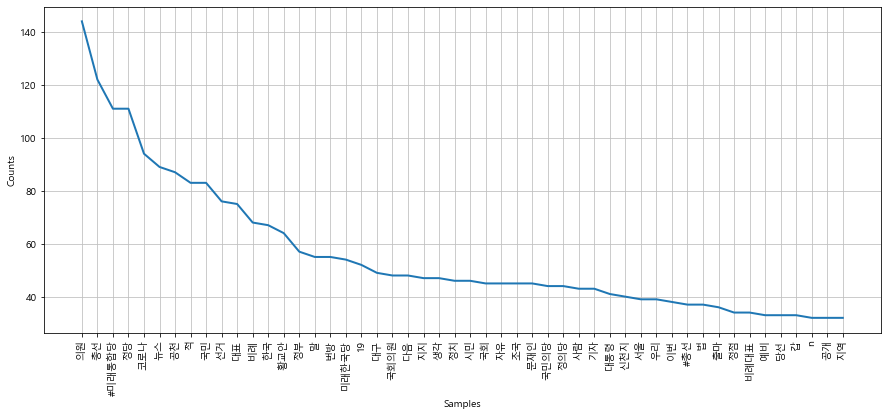

In [92]:
import graphviz
plt.figure(figsize=(15, 6))
ko.plot(50)
plt.show()

In [9]:
data = ko.vocab().most_common(200)

from wordcloud import ImageColorGenerator
import numpy as np

coloring = np.array(Image.open('tonghap.jpg'))

image_colors = ImageColorGenerator(coloring)

# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white'
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud.recolor(color_func = image_colors))
plt.axis("off")
plt.show()

NameError: name 'Image' is not defined

In [ ]:
Colormap pin is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, 
    BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys,
    Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2,
    Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu,
    RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, 
    Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, 
    YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, 
    cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, 
    gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, 
    gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, 
    inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r,
    plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, 
    summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, 
    twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


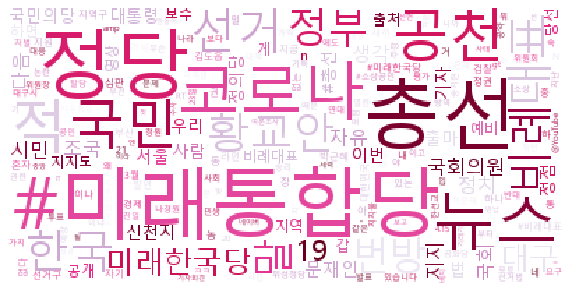

In [34]:
data = ko.vocab().most_common(200)

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator
import numpy as np

#coloring = np.array(Image.open('tonghap.jpg'))

#image_colors = ImageColorGenerator(coloring)

# 워드클라우드를 그려보자
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white',colormap = "PuRd",
                     ).generate_from_frequencies(dict(data))

plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()